# 4	Univariate Wahrscheinlichkeitstheorie

## 4.2	Erwarteter Mittelwert einer Windkraftanlage

a) Darstellung der Windgeschwindigkeitsverteilung von Europa ($\beta$ = 2) mit der Windverteilung von Passatwinden ($\beta$ = 3) für einen konstanten Skalierungsfaktor von $\eta$ = 10.


In [1]:
""" Bibliotheken importieren"""
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

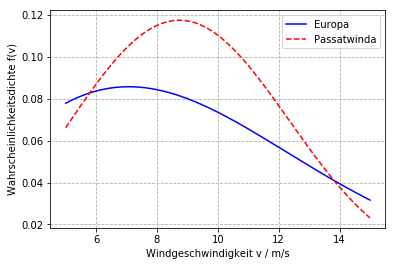

In [2]:
'Variablendefinition Weibullverteilung'
beta = [2, 3]
eta = 10
dx = 0.01
#X = np.arange(0 , 25+dx , dx)
X = np.arange(5 , 15+dx , dx)
fw=np.empty((len(beta),len(X)))
for k in [0,1]:
        
        fw[k,0:len(X)] =beta[k]/eta*(X/eta)**(beta[k]-1)*np.exp(-(X/eta)**beta[k])
        
'Grafische Darstellung'
plt.plot(X,fw[0,:], color='b')
plt.plot(X,fw[1,:], color='r',linestyle='--')
plt.grid(True, which= 'both', axis='both', linestyle='--')
plt.xlabel('Windgeschwindigkeit v / m/s')
plt.ylabel('Wahrscheinlichkeitsdichte f(v)')
plt.legend(('Europa', 'Passatwinda'))


##### Passatwinde haben eine engere Verteilung als Winde, die für Europa typisch sind. Damit lässt sich eine Wndkraftanlage für Passatwinde gezielter auslegen.




b) Die Windkraftanlage arbeitet in einem Geschwindigkeitsintervall zwischen 5 und 15 m/s. Mit einem Rotorradius von 5 m und einem Leistungsbeiwert ${c_p}$ = 0.48 sowie einer Dichte $\rho $ = 1.2 kg/m³ aus ergibt sich mit dem Erwartungswertoperator die mittlere Leistung über

$E\left( P \right) = \int\limits_5^{15} {{c_p} \cdot \rho  \cdot A \cdot \frac{1}{2} \cdot {v^3} \cdot f\left( v \right){\rm{ }}dv} $


Die Berechnung kann nicht analytisch ausgeführt werden. Die numeriche Berechnung ergibt sich aus der Python-Sequenz:

In [3]:
''' Variablendefinition Leistungsberechnung'''
roh = 1.2
r = 5
A = np.pi*r**2
cp = 0.48
P = 0.5 * cp * roh * A * X**3

''' Berechnung der Leistung'''
P1 = np.sum(P*fw[0,:]*dx)
P2 = np.sum(P*fw[1,:]*dx)
P1,P2

(15415.69386706256, 19080.325640685536)

##### Für das Beispiel ergibt sich bei einem Standort in Europa ein Erwartungswert von 15.4 kW, bei einem Standort mit Passatwinden ein Erwartungswert von 19.1 kW. Der Erwartungswert ist bei Passatwinden erwartungsgemäß höher.